In [35]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
california = datasets.fetch_california_housing()

In [6]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [7]:
missing_values = df.isnull().sum()
print("Количество пропусков по каждому признаку:\n", missing_values)

Количество пропусков по каждому признаку:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [9]:
X = df.drop('MedHouseVal', axis=1) 
y = df['MedHouseVal']             

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          
    random_state=42          
)

In [15]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred_train = lr_model.predict(X_train)

y_pred_test = lr_model.predict(X_test)

In [18]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

In [19]:
print(f"\nМетрики на обучающем множестве:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}\n")

print(f"Метрики на тестовом множестве:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


Метрики на обучающем множестве:
RMSE: 0.7197
R²: 0.6126

Метрики на тестовом множестве:
RMSE: 0.7456
R²: 0.5758


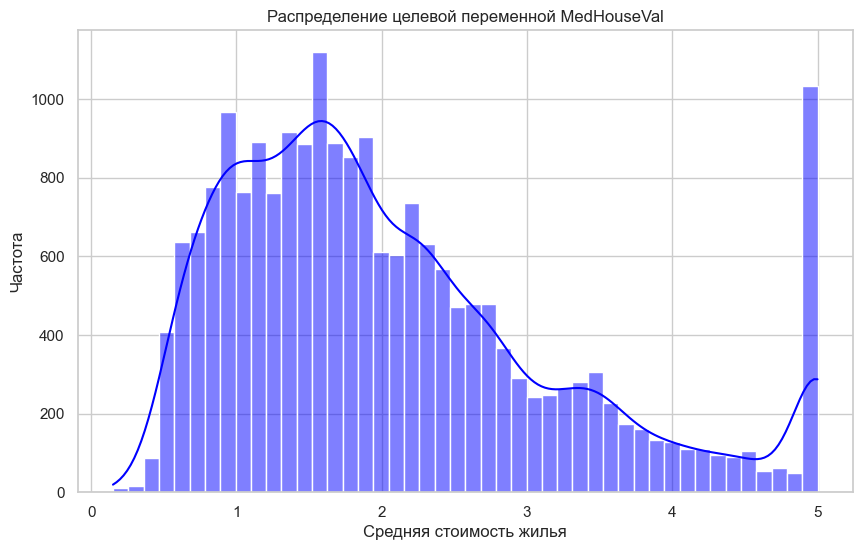

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MedHouseVal', kde=True, color='blue')
plt.title('Распределение целевой переменной MedHouseVal')
plt.xlabel('Средняя стоимость жилья')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

выбросы присутствуют в стоимости жилья 5 

In [23]:
corr_matrix = df.corr()

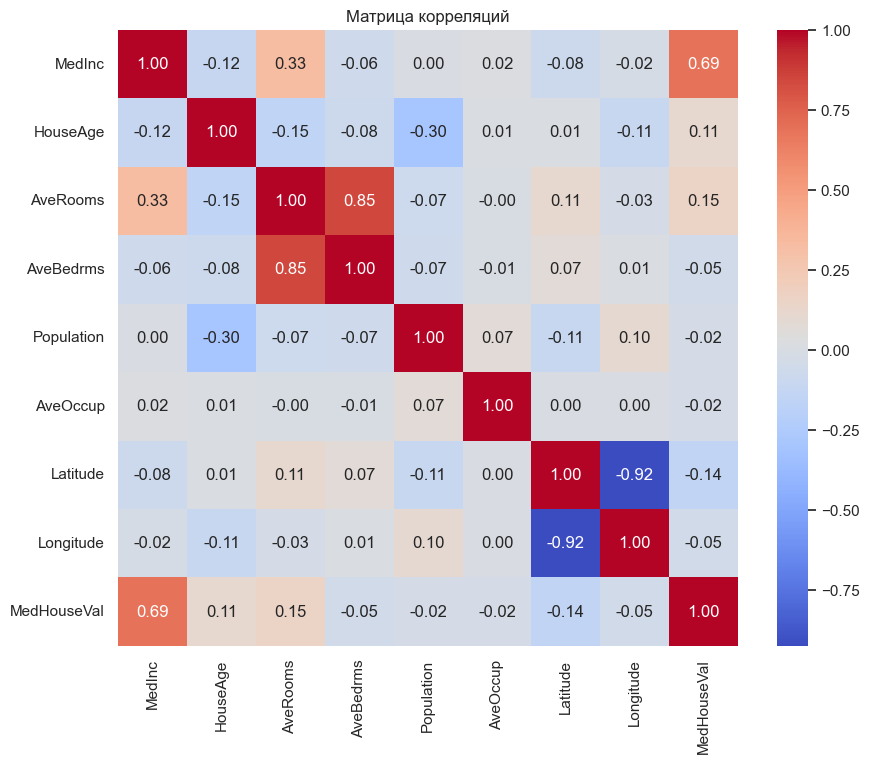

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

На основе матрицы корреляций можно сделать следующие выводы:

HouseAge (Возраст дома) имеет сильную отрицательную корреляцию с MedInc (Средний доход) и AveOccup (Средняя занятость). Это означает, что с увеличением возраста дома средний доход и средняя занятость уменьшаются.
AveRooms (Среднее количество комнат) имеет слабую положительную корреляцию с MedInc и AveOccup. Это означает, что с увеличением среднего количества комнат средний доход и средняя занятость немного увеличиваются.
AveBedrms (Среднее количество спален) имеет слабую отрицательную корреляцию с MedInc и AveOccup. Это означает, что с увеличением среднего количества спален средний доход и средняя занятость немного уменьшаются.
Population (Население) имеет слабую положительную корреляцию с AveOccup. Это означает, что с увеличением населения средняя занятость немного увеличивается.
AveOccup (Средняя занятость) имеет сильную положительную корреляцию с Population. Это означает, что с увеличением населения средняя занятость сильно увеличивается.
Latitude (Широта) имеет сильную отрицательную корреляцию с Longitude. Это означает, что с увеличением широты долгота уменьшается.
Longitude (Долгота) имеет сильную отрицательную корреляцию с Latitude. Это означает, что с увеличением долготы широта уменьшается.
MedHouseVal (Средняя стоимость дома) имеет слабую положительную корреляцию с AveOccup. Это означает, что с увеличением средней занятости средняя стоимость дома немного увеличивается.

In [26]:
updated_df = df.drop(columns=['Population'])

In [27]:
X_updated = updated_df.drop('MedHouseVal', axis=1)
y_updated = updated_df['MedHouseVal']

In [29]:
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(
    X_updated, y_updated, test_size=0.2, random_state=42
)

In [31]:
lr_model_updated = LinearRegression()
lr_model_updated.fit(X_train_updated, y_train_updated)
y_pred_train_updated = lr_model_updated.predict(X_train_updated)
y_pred_test_updated = lr_model_updated.predict(X_test_updated)

In [32]:
rmse_train_updated = np.sqrt(mean_squared_error(y_train_updated, y_pred_train_updated))
r2_train_updated = r2_score(y_train_updated, y_pred_train_updated)
rmse_test_updated = np.sqrt(mean_squared_error(y_test_updated, y_pred_test_updated))
r2_test_updated = r2_score(y_test_updated, y_pred_test_updated)

print("\nМетрики на обновленном обучающем множестве:")
print(f"RMSE: {rmse_train_updated:.4f}, R²: {r2_train_updated:.4f}\n")

print("Метрики на обновленном тестовом множестве:")
print(f"RMSE: {rmse_test_updated:.4f}, R²: {r2_test_updated:.4f}")


Метрики на обновленном обучающем множестве:
RMSE: 0.7197, R²: 0.6125

Метрики на обновленном тестовом множестве:
RMSE: 0.7456, R²: 0.5757


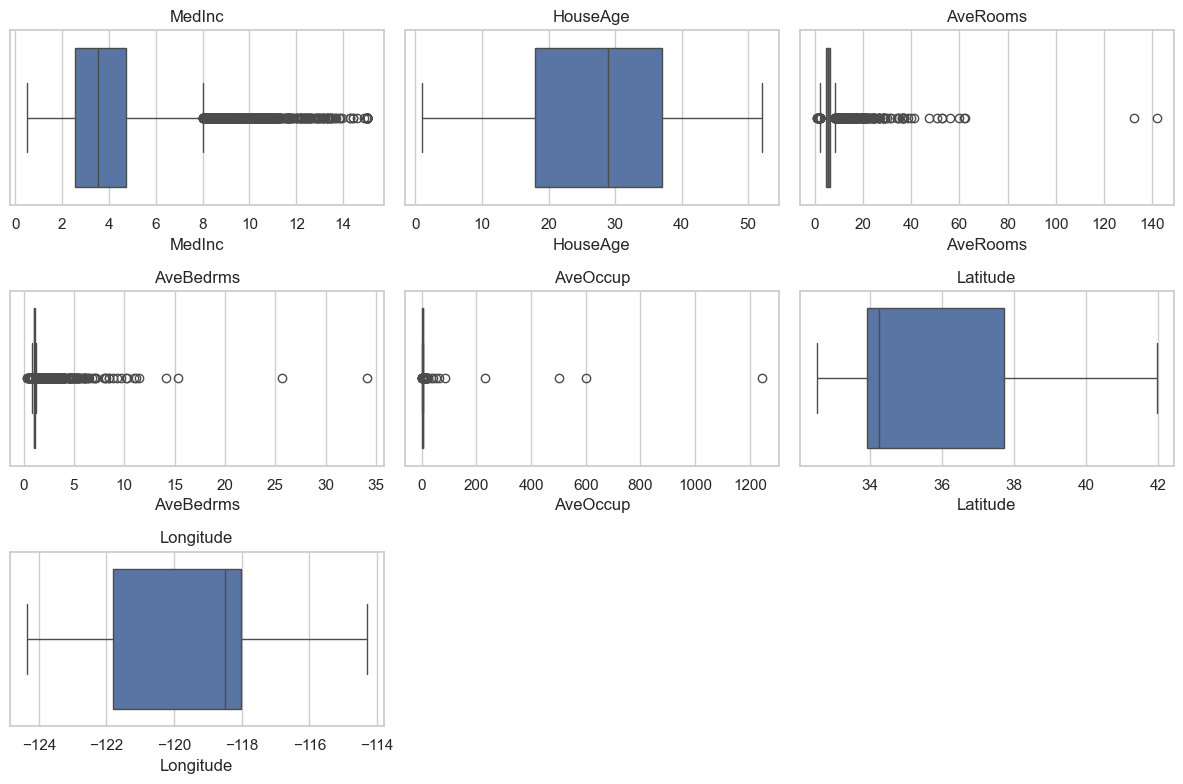

In [34]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(updated_df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=updated_df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [36]:
def remove_outliers_zscore(dataframe, threshold=3):
    z_scores = np.abs(stats.zscore(dataframe.select_dtypes(include=np.number)))
    filtered_entries = (z_scores < threshold).all(axis=1)
    cleaned_data = dataframe[filtered_entries]
    return cleaned_data

In [37]:
cleaned_df = remove_outliers_zscore(updated_df)

In [39]:
X_cleaned = cleaned_df.drop('MedHouseVal', axis=1)
y_cleaned = cleaned_df['MedHouseVal']

In [40]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

In [41]:
lr_model_cleaned = LinearRegression()
lr_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
y_pred_train_cleaned = lr_model_cleaned.predict(X_train_cleaned)
y_pred_test_cleaned = lr_model_cleaned.predict(X_test_cleaned)

In [43]:
rmse_train_cleaned = np.sqrt(mean_squared_error(y_train_cleaned, y_pred_train_cleaned))
r2_train_cleaned = r2_score(y_train_cleaned, y_pred_train_cleaned)
rmse_test_cleaned = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_test_cleaned))
r2_test_cleaned = r2_score(y_test_cleaned, y_pred_test_cleaned)

print("\nМетрики на очищенном обучающем множестве:")
print(f"RMSE: {rmse_train_cleaned:.4f}, R²: {r2_train_cleaned:.4f}\n")

print("Метрики на очищенном тестовом множестве:")
print(f"RMSE: {rmse_test_cleaned:.4f}, R²: {r2_test_cleaned:.4f}")


Метрики на очищенном обучающем множестве:
RMSE: 0.6737, R²: 0.6292

Метрики на очищенном тестовом множестве:
RMSE: 0.6659, R²: 0.6316


Обучающее множество:
RMSE: 0.6737 (уменьшился примерно на 6%)
R²: 0.6292 (увеличился примерно на 2.7%)
Тестовое множество:
RMSE: 0.6659 (уменьшился примерно на 10.7%)
R²: 0.6316 (увеличилась примерно на 9.7%)

In [44]:
transformed_cleaned_df = cleaned_df.copy()

In [45]:
transformed_cleaned_df['Log_MedInc'] = np.log(transformed_cleaned_df['MedInc'])  # Логарифм MedInc
transformed_cleaned_df['HouseAge_Squared'] = transformed_cleaned_df['HouseAge'] ** 2  # Квадрат HouseAge
transformed_cleaned_df['Sqrt_AveRooms'] = np.sqrt(transformed_cleaned_df['AveRooms'])  # Квадратный корень AveRooms

In [46]:
transformed_cleaned_df.drop(['MedInc', 'HouseAge', 'AveRooms'], axis=1, inplace=True)

In [47]:
X_transformed_cleaned = transformed_cleaned_df.drop('MedHouseVal', axis=1)
y_transformed_cleaned = transformed_cleaned_df['MedHouseVal']

In [48]:
X_train_transformed_cleaned, X_test_transformed_cleaned, \
y_train_transformed_cleaned, y_test_transformed_cleaned = train_test_split(
    X_transformed_cleaned, y_transformed_cleaned, test_size=0.2, random_state=42
)

In [49]:
lr_model_transformed_cleaned = LinearRegression()
lr_model_transformed_cleaned.fit(X_train_transformed_cleaned, y_train_transformed_cleaned)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred_train_transformed_cleaned = lr_model_transformed_cleaned.predict(X_train_transformed_cleaned)
y_pred_test_transformed_cleaned = lr_model_transformed_cleaned.predict(X_test_transformed_cleaned)

In [52]:
rmse_train_transformed_cleaned = np.sqrt(mean_squared_error(y_train_transformed_cleaned, y_pred_train_transformed_cleaned))
r2_train_transformed_cleaned = r2_score(y_train_transformed_cleaned, y_pred_train_transformed_cleaned)

rmse_test_transformed_cleaned = np.sqrt(mean_squared_error(y_test_transformed_cleaned, y_pred_test_transformed_cleaned))
r2_test_transformed_cleaned = r2_score(y_test_transformed_cleaned, y_pred_test_transformed_cleaned)

print("\nМетрики на обучающем множестве с новыми признаками:")
print(f"RMSE: {rmse_train_transformed_cleaned:.4f}, R²: {r2_train_transformed_cleaned:.4f}\n")

print("Метрики на тестовом множестве с новыми признаками:")
print(f"RMSE: {rmse_test_transformed_cleaned:.4f}, R²: {r2_test_transformed_cleaned:.4f}")


Метрики на обучающем множестве с новыми признаками:
RMSE: 0.7278, R²: 0.5673

Метрики на тестовом множестве с новыми признаками:
RMSE: 0.7231, R²: 0.5656


произошло ухудшение метрик

В ходе работы над проектом последовательно выполнялись следующие шаги:

Исследование исходных данных и очистка от пропусков: Была проведена проверка на наличие пропущенных значений, выявлено отсутствие пропусков.
Удаление выбросов: Применялся метод Z-score для фильтрации очевидных аномалий в данных, что обеспечило чистоту обучающего и тестового наборов.
Трансформации признаков: Были проведены математические преобразования некоторых ключевых признаков:
Логарифмирование признака MedInc
Возведение в квадрат признака HouseAge
Извлечение квадратного корня из признака AveRooms
Оценка качества моделей: Модели сравнивались по двум ключевым метрикам: Root Mean Squared Error (RMSE) и Coefficient of Determination (R²).

№	Модель	RMSE (Train)	R² (Train)	RMSE (Test)	R² (Test)	Признаки
1	Без очистки данных	0.7197	0.6126	0.7456	0.5758	Original features
2	С удалением выбросов	0.6737	0.6292	0.6659	0.6316	Cleaned original features
3	С преобразованиями	0.7278	0.5673	0.7231	0.5656	Transformed features

Лучшей оказалась вторая модель (с удаленными выбросами), продемонстрировавшая наименьшие значения RMSE и наибольшие значения R² среди всех рассмотренных вариантов.

Модель с применением математических преобразований признаков оказалась наименее эффективной, вероятно, из-за неоптимального выбора форматов преобразования. Вероятно, структура данных оказалась чувствительной к таким изменениям, и простейшее удаление выбросов оказалось достаточным для повышения качества модели.